In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import isfile, join
import random
from skimage.feature import local_binary_pattern

folder_path = '../atividade_final/dat'

In [2]:
def item_freq(a):
    items, freq = np.unique(a, return_counts=True)
    return np.array([items, freq]).T

class ImageItem:
    def __init__(self, image_name, image_path, image_class):
        self.image_name = image_name
        self.image_path = image_path
        self.image_class = image_class  
        
    def read_image(self):
        return cv2.imread(self.image_path, cv2.IMREAD_GRAYSCALE)
    
    def __str__(self):
        return "class: '%s', path: '%s'" % (self.image_class, self.image_path)

class ImageItemCollection:
    def __init__(self):
        self.array = []
        self.by_class = {}
        
    def append(self, image_item):
        self.array.append(image_item)
        if not (image_item.image_class in self.by_class):
            self.by_class[image_item.image_class] = []
        self.by_class[image_item.image_class].append(image_item)
        
    def build_training_and_validation_sets(self, training_pct = 0.7):
        training_set = []
        validation_set = []
        for class_key in self.by_class:
            class_items = items.by_class[class_key]
            training_ammount = int(len(class_items) * training_pct)

            #shuffle without changing image_collection following functional principles
            shuffle_result = sorted(class_items, key=lambda class_items: random.random())

            for i in range(0,len(shuffle_result)):
                if i < training_ammount:
                    training_set.append(shuffle_result[i])
                else:
                    validation_set.append(shuffle_result[i])
        return (training_set, validation_set)
    
class EpDefaultReader:
    @staticmethod
    def list_files(folder_path):
        folder_items = os.listdir(folder_path)
        folder_files = [f for f in folder_items if isfile(join(folder_path, f))]
        return folder_files
    @staticmethod
    def get_image_class(folder_file):
        return folder_file.split("_")[0]
    @staticmethod
    def load_items(folder_path):
        folder_files = EpDefaultReader.list_files(folder_path)
        if len(folder_files) <= 0:
            raise ValueError("Folder should contain at least one file")
        items = ImageItemCollection()
        for folder_file in folder_files:
            full_path = join(folder_path, folder_file)
            image_class = EpDefaultReader.get_image_class(folder_file)
            items.append(ImageItem(folder_file, full_path, image_class))
        return items


class LbpResult:
    def __init__(self, image, image_class, lbp):
        self.image = image
        self.image_class = image_class
        self.lbp = lbp
        orig_histogram = item_freq(lbp.ravel())
        self.histogram = orig_histogram[:, 1]/sum(orig_histogram[:, 1])
        
    def plot(self):
        x = np.arange(0, len(self.histogram))

        fig, ax = plt.subplots(1,3, figsize=(15,5))
        ax[0].imshow(self.image, cmap='gray')
        ax[0].set_title("Classe: %s" % (self.image_class))
        ax[1].imshow(self.lbp, cmap='gray')
        ax[1].set_title("LBP")
        ax[2].bar(x, self.histogram)
        ax[2].set_ylim([0, 1])
        ax[2].set_title("Histograma Normalizado")
        
        plt.show()

def calculate_lbp(image, image_class, radius = 2):
    no_points = 8 * radius
    # Uniform LBP is used
    lbp = local_binary_pattern(image, no_points, radius, method='uniform')
    return LbpResult(image, image_class, lbp)
    

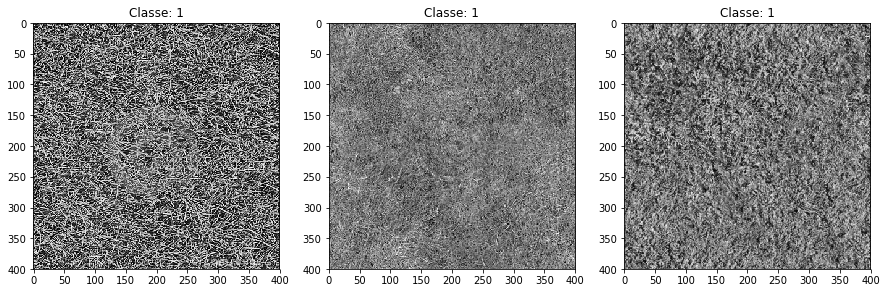

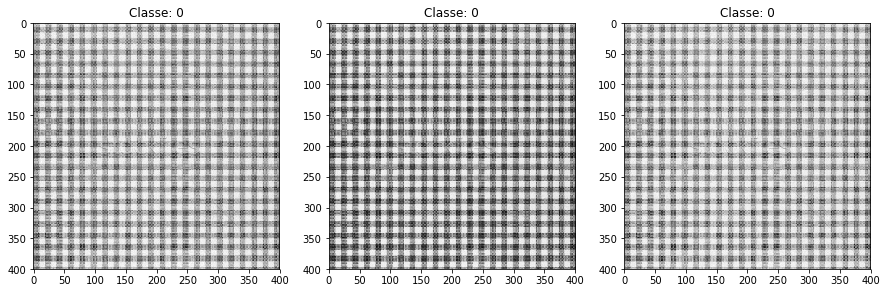

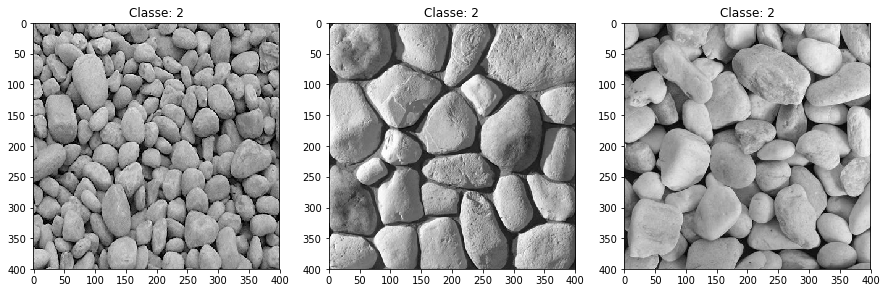

In [3]:
items = EpDefaultReader.load_items(folder_path)

for class_key in items.by_class:
    class_items = items.by_class[class_key]
    fig, imgs = plt.subplots(1,len(class_items), figsize=(15,5))
    for i in range(len(class_items)):
        image = class_items[i].read_image()
        imgs[i].imshow(image, cmap='gray')
        imgs[i].set_title("Classe: %s" % (class_items[i].image_class))
    plt.show()
    

Training


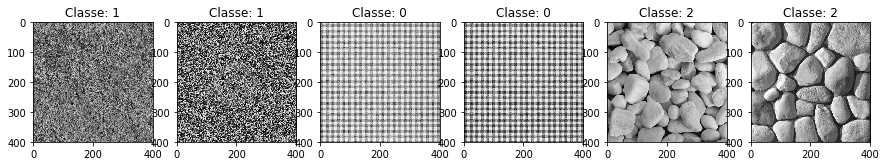

Validation


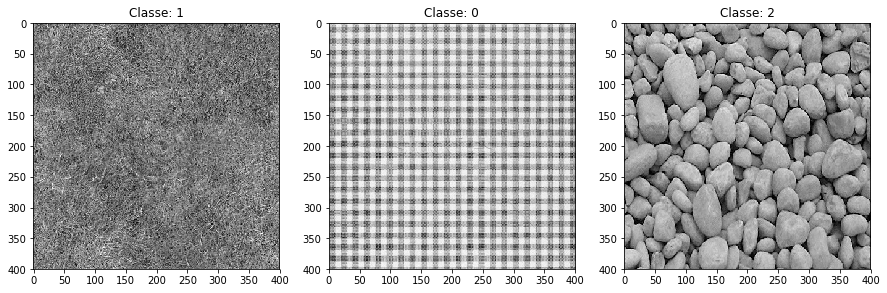

In [4]:
(training_set, validation_set) = items.build_training_and_validation_sets()

print("Training")
fig, imgs = plt.subplots(1,len(training_set), figsize=(15,5))
for i in range(len(training_set)):
    item = training_set[i]
    image = item.read_image()
    imgs[i].imshow(image, cmap='gray')
    imgs[i].set_title("Classe: %s" % (item.image_class))
plt.show()
    
print("Validation")
fig, imgs = plt.subplots(1,len(validation_set), figsize=(15,5))
for i in range(len(validation_set)):
    item = validation_set[i]
    image = item.read_image()
    imgs[i].imshow(image, cmap='gray')
    imgs[i].set_title("Classe: %s" % (item.image_class))
plt.show()


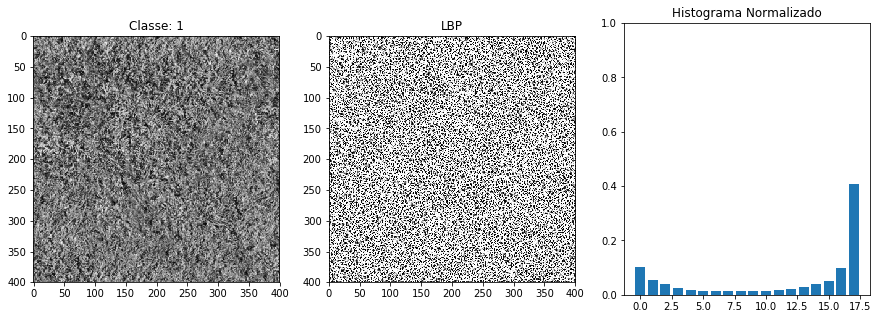

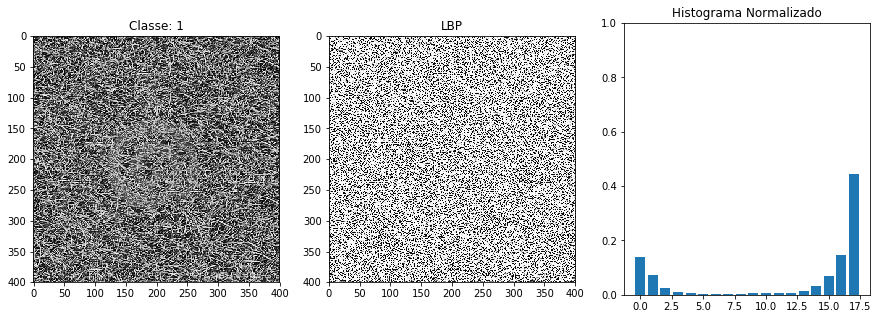

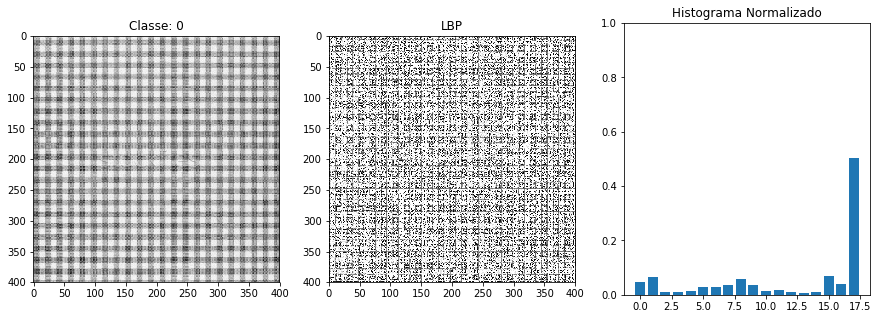

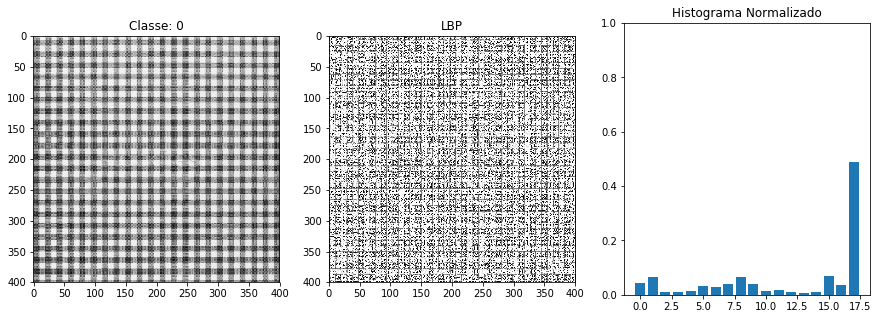

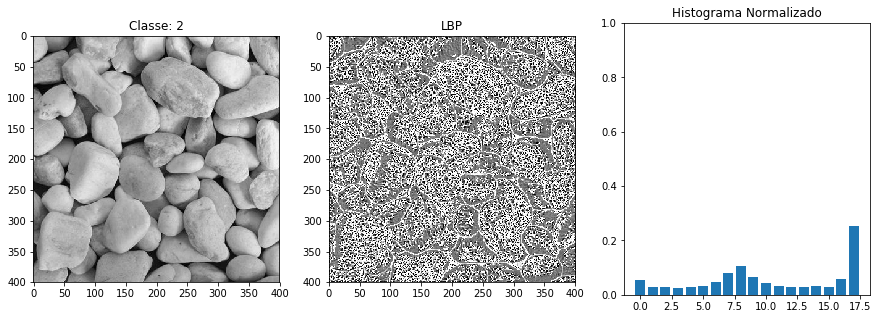

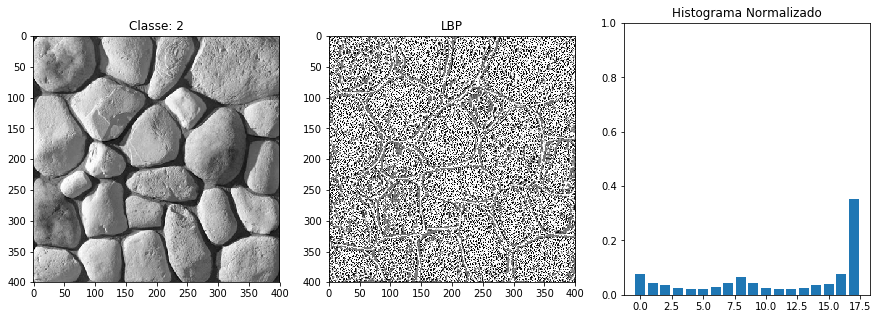

In [5]:
lbp_results = []
for training_item in training_set:
    image = training_item.read_image()
    lbp_result = calculate_lbp(image, training_item.image_class)
    lbp_results.append(lbp_result)
    lbp_result.plot()

[[2]
 [2]
 [1]
 [1]
 [0]
 [0]]
6
0.0114086078538
3
[[0.06419375 0.0361375  0.03186875 0.02528125 0.02429063 0.0271375
  0.03635938 0.06200313 0.08537813 0.05493125 0.0340875  0.02686875
  0.02393438 0.02790312 0.03403438 0.0347875  0.06730312 0.3035    ]
 [0.04614688 0.06564375 0.0094     0.0091125  0.01318438 0.02995938
  0.02939063 0.03670938 0.06245    0.03712812 0.01405312 0.0168375
  0.00930312 0.00742813 0.01024687 0.06775    0.0393     0.49595624]
 [0.120175   0.06304063 0.03313125 0.01788438 0.01243125 0.01010938
  0.0094     0.00902187 0.00954375 0.01020625 0.01056875 0.01227812
  0.01517187 0.021775   0.03688125 0.05935    0.12213437 0.42689687]]


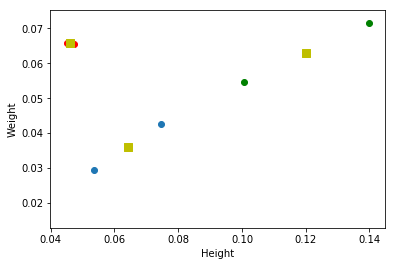

In [8]:
x = []
for lbp in lbp_results:
    x.append(np.float32(lbp.histogram))
    
k_means_input=np.array(x)
    
k_size = 3
max_iteration = 10
accuracy = 0.3
    
# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 
            max_iteration, 
            accuracy)

compactness, labels, centers = cv2.kmeans(k_means_input,
                                          k_size,
                                          None,
                                          criteria,
                                          10,
                                          cv2.KMEANS_RANDOM_CENTERS)

print labels
print len(labels)
print compactness
print len(centers)
print centers


# Now separate the data, Note the flatten()
A = k_means_input[labels.ravel()==0]
B = k_means_input[labels.ravel()==1]
C = k_means_input[labels.ravel()==2]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(C[:,0],C[:,1],c = 'g')
plt.scatter(centers[:,0],centers[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

